# 22. 편미방_Wave

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)

$$\frac {\partial^2 u} {\partial x^2} = \frac {\partial^2 u} {\partial t^2}$$
- 함수값 경계 조건 및 초기 조건과 초기 속도(도함수)가 주어진 경우<br>
$$u(0,t)=0, \;\; u(\pi,t)=0$$<br>
$$u(x,0) = \begin {bmatrix} x & 0 < x < \frac {\pi}{2} \\ \pi - x & \frac {\pi}{2} < x <\pi \end {bmatrix}, \;\; \frac {\partial u}{\partial t}(x,0) = 0$$

In [87]:
c = 1

x = np.linspace(0, np.pi, 81)
h = x[1]-x[0]

tf = 2
n_time = 160
k = tf/n_time

lam2 = (c*k/h)**2
print(lam2)

0.10132118364233779


- u에 초기값과 경계조건 부여

In [90]:
#u = np.zeros(x.shape)
u = np.piecewise(x, [x < np.pi/2, x >= np.pi/2], [lambda x: x, lambda x: np.pi - x])
print(u)

u_next = np.zeros(u.shape)
u_old = np.zeros(u.shape)

[0.     0.0393 0.0785 0.1178 0.1571 0.1963 0.2356 0.2749 0.3142 0.3534
 0.3927 0.432  0.4712 0.5105 0.5498 0.589  0.6283 0.6676 0.7069 0.7461
 0.7854 0.8247 0.8639 0.9032 0.9425 0.9817 1.021  1.0603 1.0996 1.1388
 1.1781 1.2174 1.2566 1.2959 1.3352 1.3744 1.4137 1.453  1.4923 1.5315
 1.5708 1.5315 1.4923 1.453  1.4137 1.3744 1.3352 1.2959 1.2566 1.2174
 1.1781 1.1388 1.0996 1.0603 1.021  0.9817 0.9425 0.9032 0.8639 0.8247
 0.7854 0.7461 0.7069 0.6676 0.6283 0.589  0.5498 0.5105 0.4712 0.432
 0.3927 0.3534 0.3142 0.2749 0.2356 0.1963 0.1571 0.1178 0.0785 0.0393
 0.    ]


- Finite difference 식에 따른 계산

In [93]:
t = 0

for it in range(0, n_time):
    t += k
    for ix in range(1, len(x)-1):
        if it == 0:
            u_next[ix] = lam2/2 * u[ix-1] + (1-lam2)*u[ix] + lam2/2*u[ix+1]
        else:
            u_next[ix] = lam2 * u[ix-1] + 2*(1-lam2)*u[ix] + lam2*u[ix+1] - u_old[ix]
    u_old = np.copy(u)
    u = np.copy(u_next)

print(t)
print(u)

1.999999999999995
[ 0.     -0.041  -0.0806 -0.1196 -0.1558 -0.1888 -0.2288 -0.2819 -0.3326
 -0.3675 -0.3943 -0.4149 -0.4213 -0.4241 -0.4299 -0.4285 -0.4275 -0.4311
 -0.4282 -0.4286 -0.4309 -0.4275 -0.4302 -0.4293 -0.4281 -0.4308 -0.4276
 -0.4304 -0.4287 -0.429  -0.43   -0.428  -0.4306 -0.4277 -0.4307 -0.4278
 -0.4305 -0.428  -0.4303 -0.4281 -0.4302 -0.4281 -0.4303 -0.428  -0.4305
 -0.4278 -0.4307 -0.4277 -0.4306 -0.428  -0.43   -0.429  -0.4287 -0.4304
 -0.4276 -0.4308 -0.4281 -0.4293 -0.4302 -0.4275 -0.4309 -0.4286 -0.4282
 -0.4311 -0.4275 -0.4285 -0.4299 -0.4241 -0.4213 -0.4149 -0.3943 -0.3675
 -0.3326 -0.2819 -0.2288 -0.1888 -0.1558 -0.1196 -0.0806 -0.041   0.    ]


- 이론해 계산

In [96]:
u_exact = np.zeros(u.shape)
for n in range(1,80,2):
    u_exact += 4/(np.pi * n**2) *np.sin(n*np.pi/2) * np.cos(n*c*tf)*np.sin(n*x)

- 결과 비교

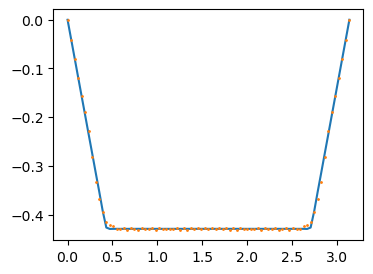

In [99]:
plt.figure(figsize=(4,3))
plt.plot(x, u_exact)
plt.plot(x, u, "o", ms=1)
plt.show()